In [65]:
from __future__ import division
import pandas as pd 
import numpy as np 

#Visualisations
import matplotlib.pyplot as plt 
import seaborn as sns

from datetime import datetime

#Utilise Yahoo Finance for data
import yfinance as yf

In [66]:
stocks = ['GOOG', 'TSLA', 'MSFT']
end = datetime.now()

#Look over preivous year
start = datetime(end.year-1, end.month, end.day)

for stock in stocks:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [67]:
# Visualise simple statistics relating to a stock listed above

GOOG.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,162.352043,162.768814,164.334530,161.189446,162.680641,1.984486e+07
std,15.187207,15.137816,15.276241,14.980843,15.119588,8.448348e+06
min,132.085403,132.559998,134.020004,131.059998,132.740005,7.409100e+06
25%,149.682175,150.009995,151.570007,148.559998,150.289993,1.456990e+07
50%,164.343552,164.639999,166.699997,163.632996,164.910004,1.754820e+07
75%,173.795547,174.309998,176.419998,172.750000,174.919998,2.153810e+07
max,196.710007,196.710007,196.889999,193.279999,196.300003,5.972800e+07


<Axes: xlabel='Date'>

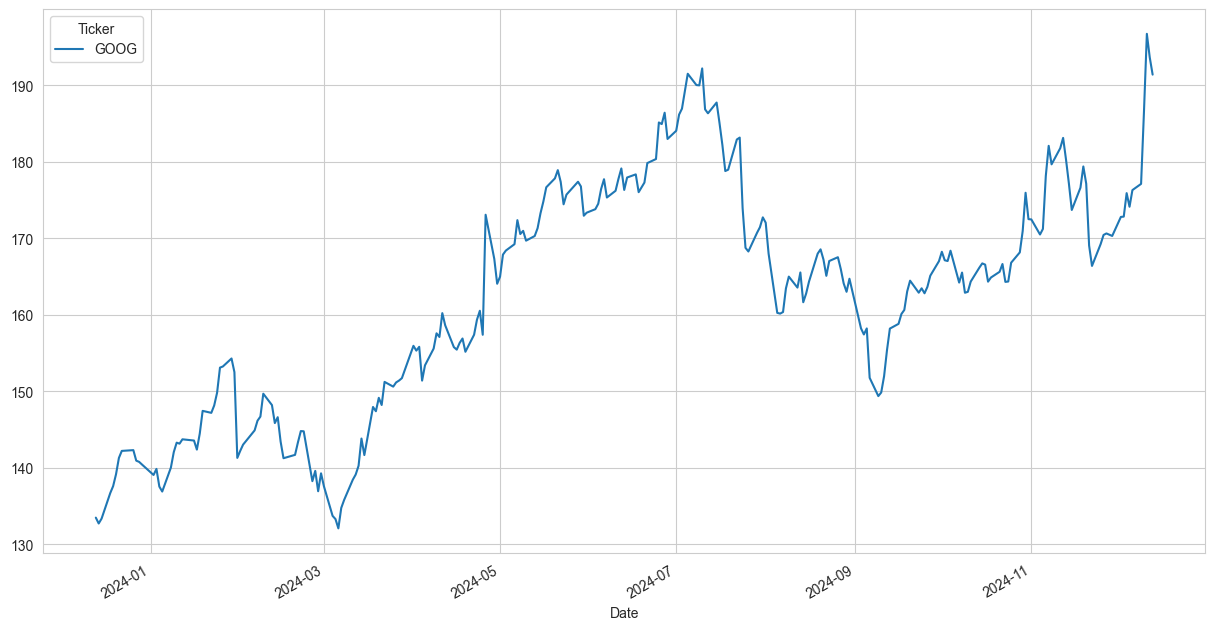

In [68]:
# Visualise change in stock price over time
sns.set_style('whitegrid')
GOOG['Adj Close'].plot(legend = True, figsize = (15,8))

<Axes: xlabel='Date'>

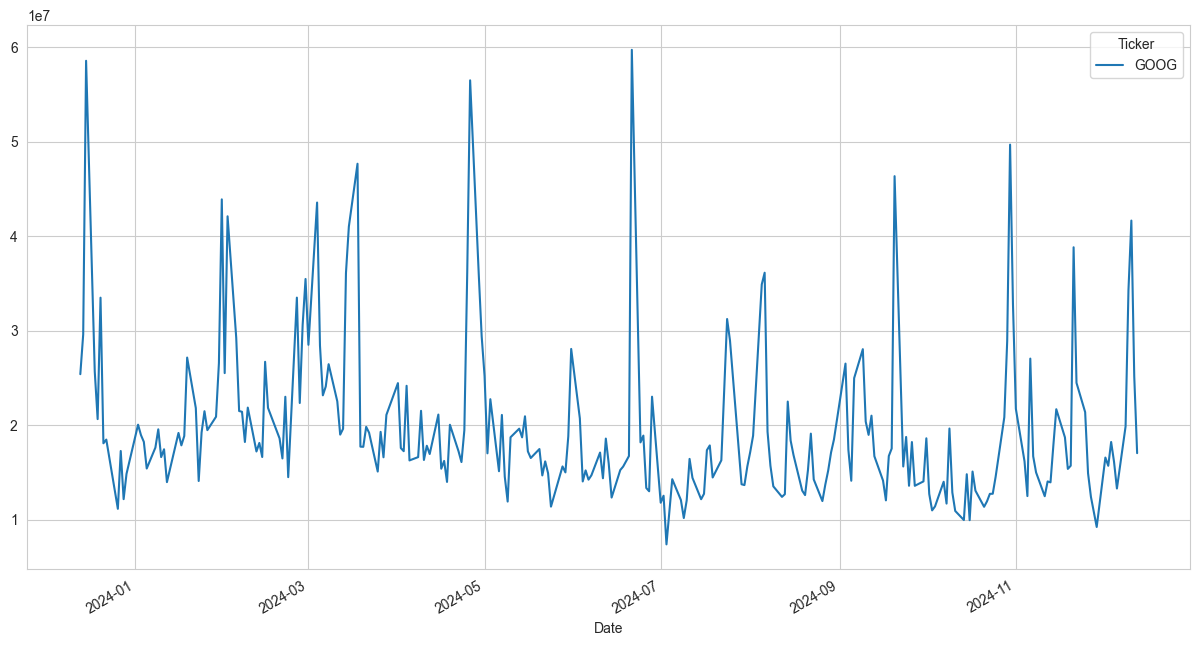

In [69]:
# Visualise volume
GOOG['Volume'].plot(legend = True, figsize = (15,8))

In [70]:
# Moving Average of stock listed above

average = [9, 21, 50]
for avg in average:
    label = "M.Avg for %s days" %(str(avg))
    GOOG[label] = GOOG['Adj Close'].rolling(window = avg, center = False).mean()
    
GOOG.tail()

Price,Adj Close,Close,High,Low,Open,Volume,M.Avg for 9 days,M.Avg for 21 days,M.Avg for 50 days
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG,,,
Date,,,,,,,,,
2024-12-09,177.100006,177.100006,178.039993,175.399994,175.714996,19887800,173.372306,174.942054,170.992430
2024-12-10,186.529999,186.529999,188.029999,182.669998,184.535004,34317400,175.161567,175.269378,171.383019
2024-12-11,196.710007,196.710007,196.889999,186.259995,186.699997,41664500,178.059742,175.981102,171.952637
2024-12-12,193.630005,193.630005,196.705002,193.279999,196.300003,25197800,180.652320,176.481947,172.482829
2024-12-13,191.380005,191.380005,194.339996,191.259995,192.750000,17059508,182.718545,177.010258,172.970018


<Axes: xlabel='Date'>

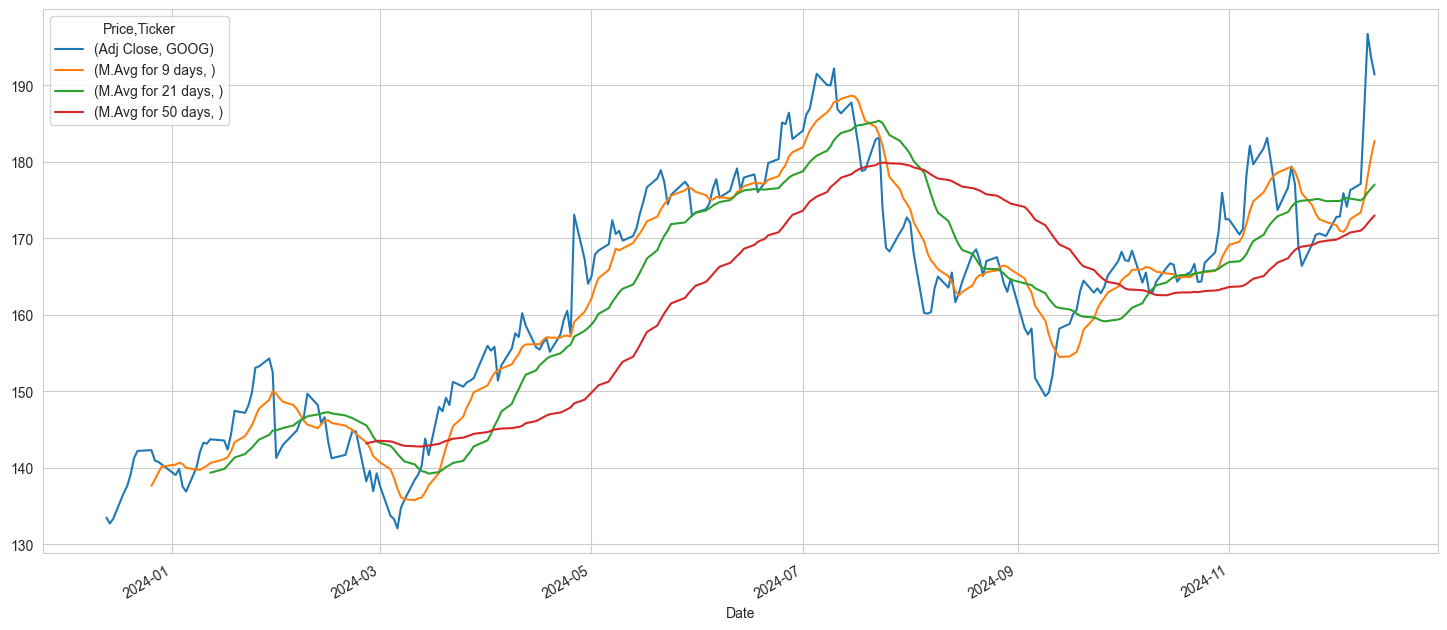

In [71]:
GOOG[['Adj Close', 'M.Avg for 9 days', 'M.Avg for 21 days', 'M.Avg for 50 days']].plot(subplots = False, figsize = (18,8))

In [72]:
# Daily Return on Average

GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
GOOG.tail()

Price,Adj Close,Close,High,Low,Open,Volume,M.Avg for 9 days,M.Avg for 21 days,M.Avg for 50 days,Daily Return
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG,,,,
Date,,,,,,,,,,
2024-12-09,177.100006,177.100006,178.039993,175.399994,175.714996,19887800,173.372306,174.942054,170.992430,0.004595
2024-12-10,186.529999,186.529999,188.029999,182.669998,184.535004,34317400,175.161567,175.269378,171.383019,0.053247
2024-12-11,196.710007,196.710007,196.889999,186.259995,186.699997,41664500,178.059742,175.981102,171.952637,0.054576
2024-12-12,193.630005,193.630005,196.705002,193.279999,196.300003,25197800,180.652320,176.481947,172.482829,-0.015658
2024-12-13,191.380005,191.380005,194.339996,191.259995,192.750000,17059508,182.718545,177.010258,172.970018,-0.011620


<Axes: xlabel='Date'>

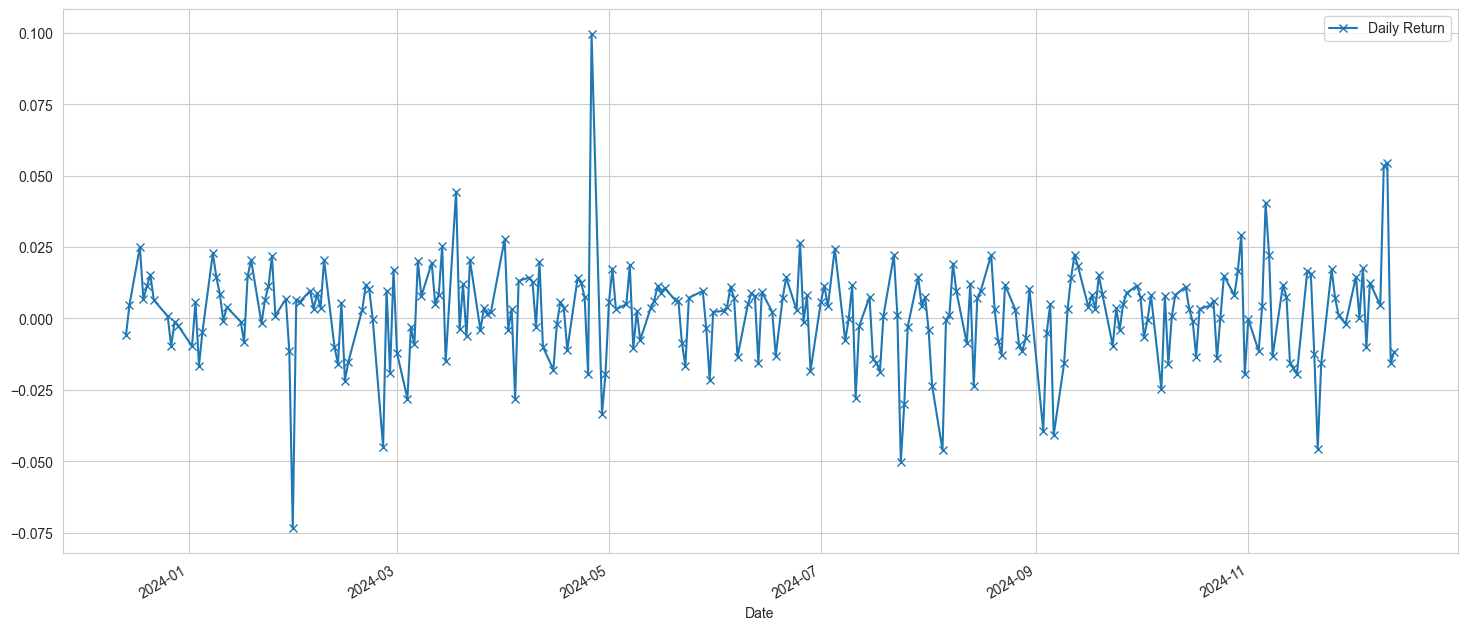

In [73]:
# Visaulise the Daily Return on Average
GOOG['Daily Return'].plot(legend = True, figsize = (18,8), linestyle = '-', marker = 'x')

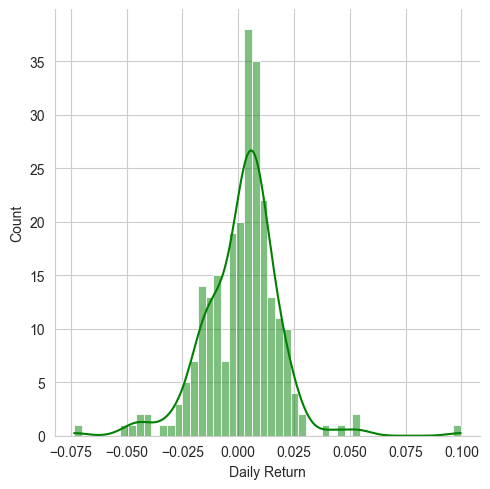

In [74]:
# Visualise the distribution of data utilising Seaborn

sns.displot(GOOG['Daily Return'].dropna(), color = 'Green', bins=50, kde = True)

In [75]:
# Check for correlation between all stocks above daily returns

comparison = yf.download(stocks, start, end)['Adj Close']
comparison_chng = comparison.pct_change()
comparison_chng.head()

[*********************100%***********************]  3 of 3 completed


Ticker,GOOG,MSFT,TSLA
Date,,,
2023-12-13,NaN,NaN,NaN
2023-12-14,-0.005748,-0.022544,0.049145
2023-12-15,0.004805,0.013117,0.009759
2023-12-18,0.025030,0.005179,-0.005602
2023-12-19,0.006633,0.001637,0.020390


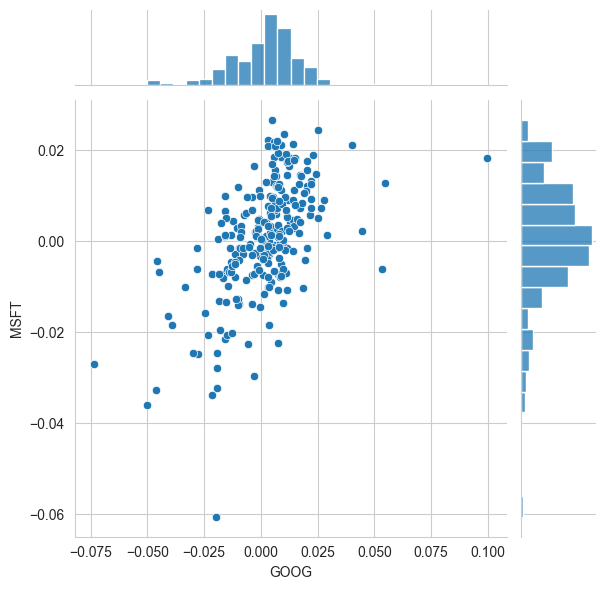

In [76]:
#Visualise on a Scattertable
sns.jointplot(x='GOOG',y='MSFT', data=comparison_chng, kind='scatter')

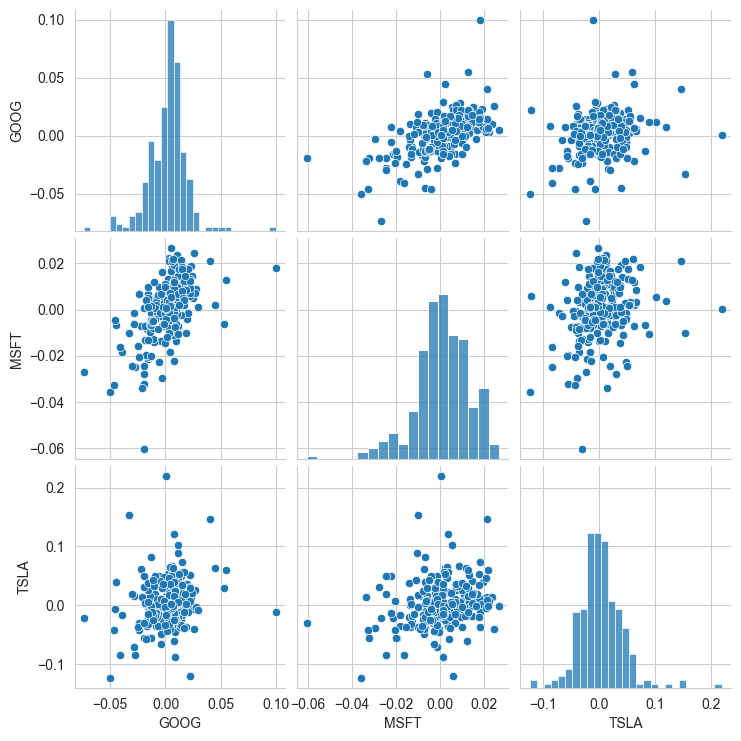

In [77]:
#Create multiple plots to visualise all of the stocks listed
sns.pairplot(comparison_chng.dropna())

Ticker      GOOG      MSFT      TSLA
Ticker                              
GOOG    1.000000  0.559298  0.221935
MSFT    0.559298  1.000000  0.255300
TSLA    0.221935  0.255300  1.000000


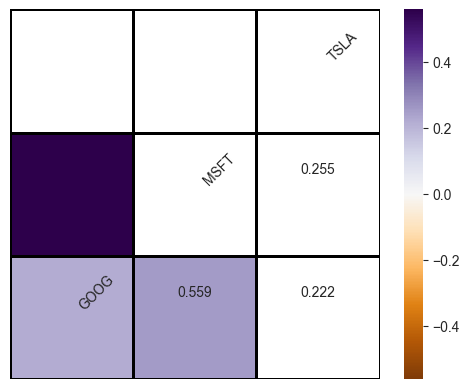

In [78]:
# Correlation Matrix Plot

correlation = comparison_chng.corr()
print(correlation)

mask = np.zeros_like(correlation, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

#Matplotlib Setup
fig, ax = plt.subplots()

# Creation of heatmap

vmax = np.abs(correlation.values[~mask]).max()
sns.heatmap(correlation, mask=mask, cmap = plt.cm.PuOr, vmin = -vmax, vmax = vmax, square = True, linecolor = 'black', linewidths = 0.8, ax=ax)

for i in range(len(correlation)):
    ax.text(i+0.7, len(correlation) - (i+0.7), correlation.columns[i],
             ha = 'center', va = 'center', rotation = 45)
    for j in range(i+1, len(correlation)):
        s = "{:.3f}".format(correlation.values[i,j])
        ax.text(j+0.5,len(correlation)-(i+0.7),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()


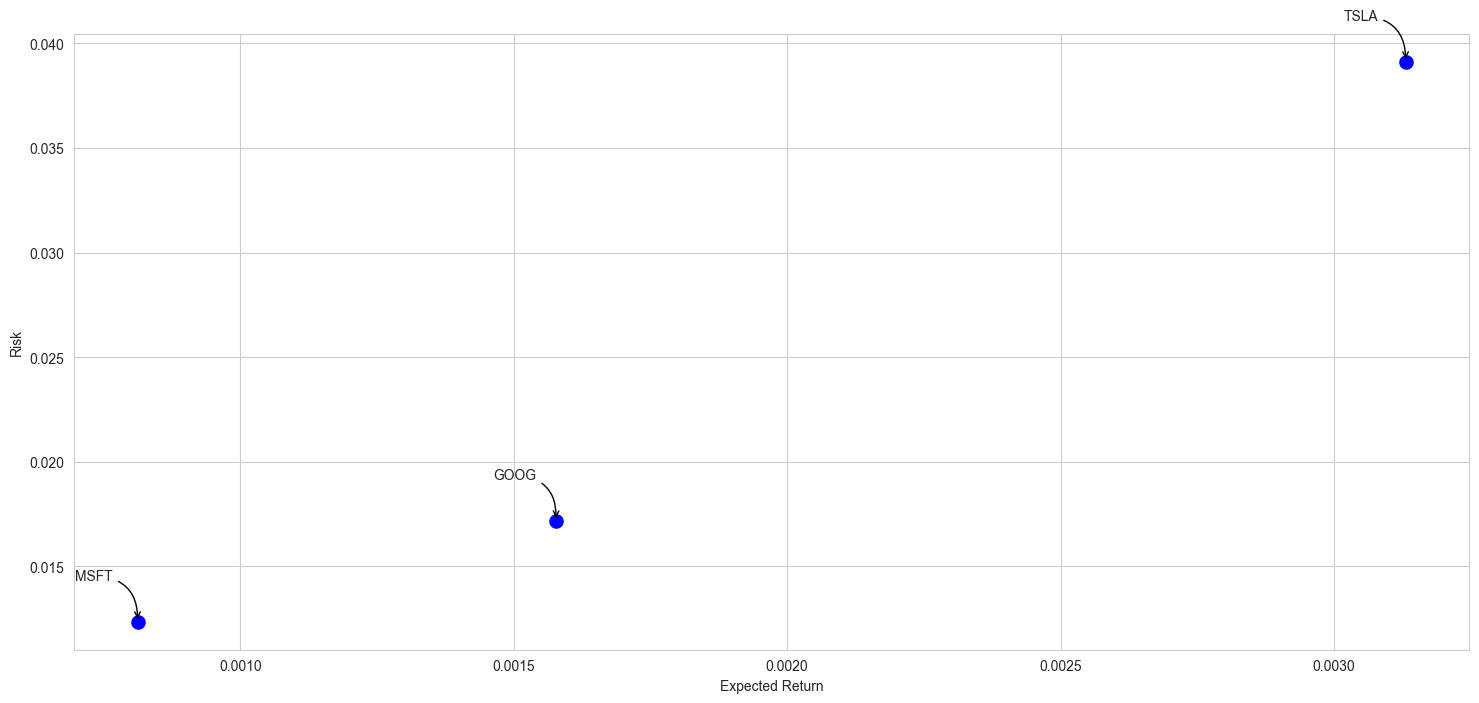

In [90]:
# Determine Risk and Expected Return

stocks_filled = comparison_chng.dropna()
plt.figure(figsize = (18,8))

plt.scatter(stocks_filled.mean(),stocks_filled.std(), s=30, linewidths=5, color='blue')

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(stocks_filled.columns, stocks_filled.mean(), stocks_filled.std()):
    plt.annotate(
        label,
        xy= (x, y), xytext = (-45, 30),
        textcoords = 'offset points',
        arrowprops = dict(arrowstyle ='->', color='black', connectionstyle = 'arc3, rad = -0.5'))

In [92]:
stocks_filled.head()

Ticker,GOOG,MSFT,TSLA
Date,,,
2023-12-14,-0.005748,-0.022544,0.049145
2023-12-15,0.004805,0.013117,0.009759
2023-12-18,0.025030,0.005179,-0.005602
2023-12-19,0.006633,0.001637,0.020390
2023-12-20,0.011296,-0.007073,-0.039188


In [93]:
#Visualise confidence intervals for possible loss at 95% confience
stocks_filled['GOOG'].quantile(q=0.05)

np.float64(-0.024059638932367598)

In [94]:
#Visualise confidence intervals for possible loss at 99% confience
stocks_filled['GOOG'].quantile(q=0.01)

np.float64(-0.04584633368130803)

In [103]:
# Forecasting Risk and Value of assets

days = 365

#Delta
dt = 1/365

mu = stocks_filled.mean()['GOOG']

sigma = stocks_filled.std()['GOOG']

def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        
        #Shock & Drift as per Monte Carlo Formula
        shock[x] = np.random.normal(loc = mu *dt, scale = sigma * np.sqrt(dt))
        
        drift[x] = mu * dt
        
        # New Price Estimate = Old Price + Old Price(Shock + Drift)
        price[x] = price[x - 1] + (price[x - 1] * (drift[x] + shock[x]))
    
    return price

In [98]:
#Obtain Start price
GOOG.head(1)

Price,Adj Close,Close,High,Low,Open,Volume,M.Avg for 9 days,M.Avg for 21 days,M.Avg for 50 days,Daily Return
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG,,,,
Date,,,,,,,,,,
2023-12-13,133.490372,133.970001,134.779999,132.949997,134.544998,25414500,NaN,NaN,NaN,NaN
2023-12-14,132.723114,133.199997,135.035004,131.059998,134.770004,29619100,NaN,NaN,NaN,-0.005748


Text(0.5, 1.0, 'Monte Carlo Forecast for GOOG')

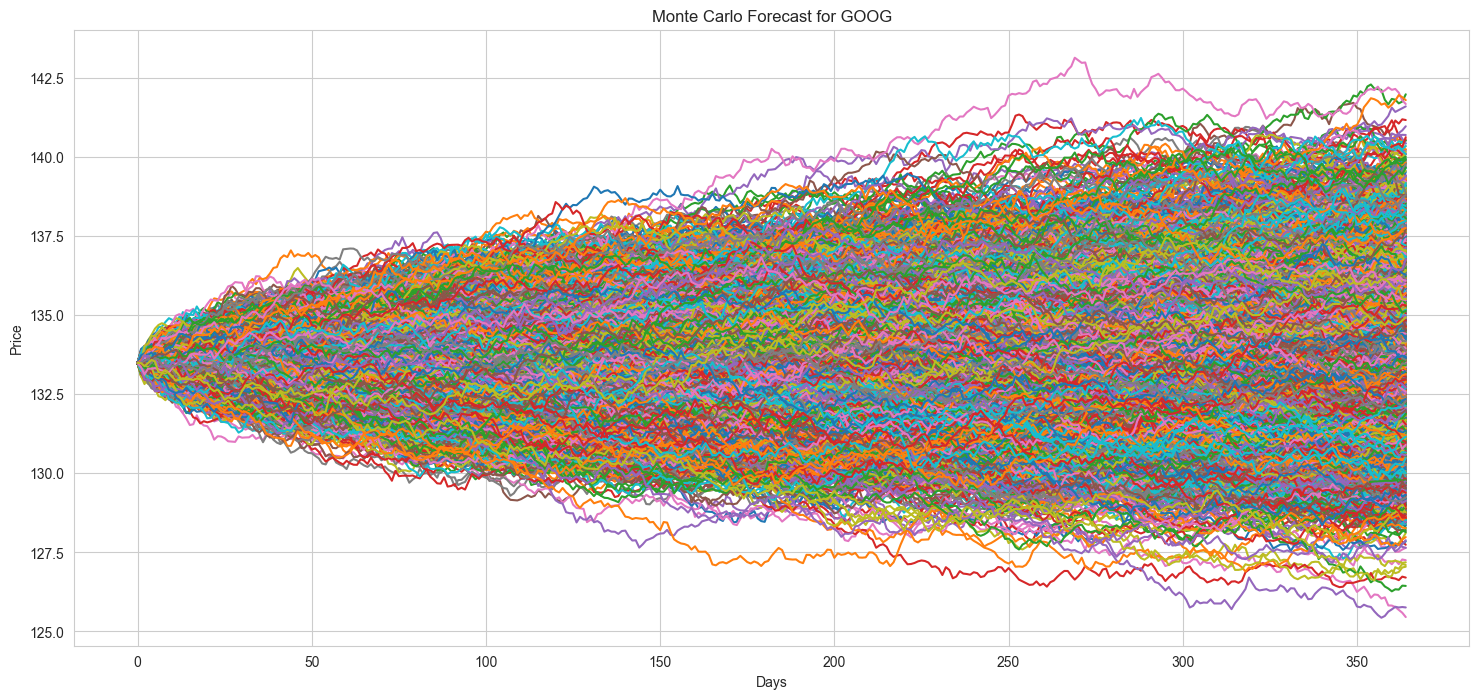

In [133]:
# Run the simulaiton 500 times
start_price = 133.49
plt.figure(figsize=(18,8))

for run in range(1,5000):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Forecast for GOOG')

Text(0.5, 1.0, 'Final price distribution for GOOG after 365 days')

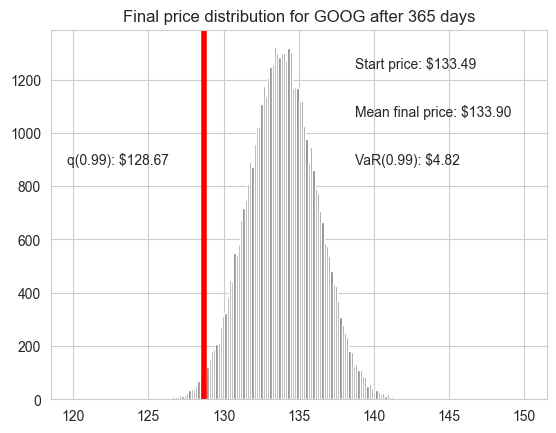

In [132]:
runs =50000

simulation = np.zeros(runs)

for run in range(1,runs):
    simulation[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]
q = np.percentile(simulation, 1)

plt.hist(simulation, bins=200, color='gray', range=[120, 150])

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulation.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price - q))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x = q, linewidth = 4, color='r')

plt.title(f"Final price distribution for GOOG after {days} days")
